In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test_supplement.csv', 'train.csv', 'test.csv', 'sample_submission.csv', 'train_sample.csv']


In [7]:
df_train = pd.read_csv("../input/train_sample.csv")
df_train.head(100)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,29540,3,1,42,489,2017-11-08 03:57:46,NaN,0
1,26777,11,1,25,319,2017-11-09 11:02:14,NaN,0
2,140926,12,1,13,140,2017-11-07 04:36:14,NaN,0
3,69375,2,1,19,377,2017-11-09 13:17:20,NaN,0
4,119166,9,2,15,445,2017-11-07 12:11:37,NaN,0
5,126411,13,1,17,477,2017-11-08 06:46:54,NaN,0
6,118315,1,1,13,153,2017-11-08 00:52:53,NaN,0
7,34631,12,1,6,140,2017-11-08 04:41:28,NaN,0
8,108040,12,1,19,265,2017-11-08 04:36:53,NaN,0
9,14230,3,1,13,19,2017-11-06 16:21:36,NaN,0


In [8]:
#visualize
from datetime import datetime
formatDatetime = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
df_train['new_click_time'] = df_train['click_time'].apply(formatDatetime)
df_train.head()
# utf_time = 
# df_train
df_train.describe()

,ip,app,device,os,channel,is_attributed
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91091.47618,12.033790,22.390540,22.835020,268.656180,0.002510
std,69791.74842,14.917195,264.110407,56.829508,129.692927,0.050037
min,9.00000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,40315.50000,3.000000,1.000000,13.000000,140.000000,0.000000
50%,79666.00000,12.000000,1.000000,18.000000,258.000000,0.000000
75%,118284.00000,15.000000,1.000000,19.000000,379.000000,0.000000
max,364759.00000,542.000000,3866.000000,866.000000,498.000000,1.000000


In [9]:
groups = df_train.groupby(['app', 'device','os','channel'])
groups.size()


app  device  os   channel
0    0       866  101         1
     18      0    101         1
1    1       1    13          1
                  17          1
                  24          2
                  115         1
                  118         2
                  134        14
                  135         2
                  137         1
                  150         1
                  153         4
                  178         1
                  349         1
                  371         1
                  377         4
                  439         4
                  452         3
             2    17          1
                  115         1
                  125         1
                  134         5
                  150         1
                  153         4
                  178         2
                  377         1
                  452         1
             3    13          5
                  17          3
                  24          2
              

In [10]:
# sns.distplot(titanic.age.dropna())
# sns.plt.show()

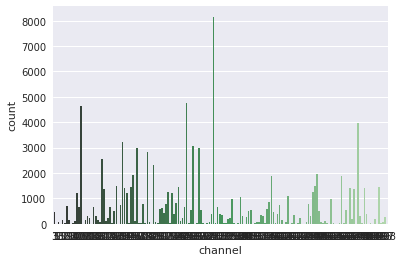

In [11]:
# df_train.plot(y="app",kind="pie")
# df_train.hist(x="new_click_time", y=["app"])
# df_train.groupby('os')['new_click_time'].plot(legend=True)
import seaborn as sns; sns.set()
sns.countplot(x="channel", data=df_train, palette="Greens_d")



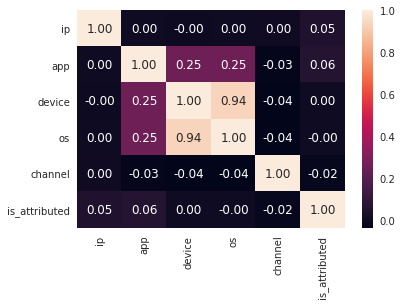

In [12]:
sns.heatmap(df_train.corr(), annot=True, fmt=".2f")


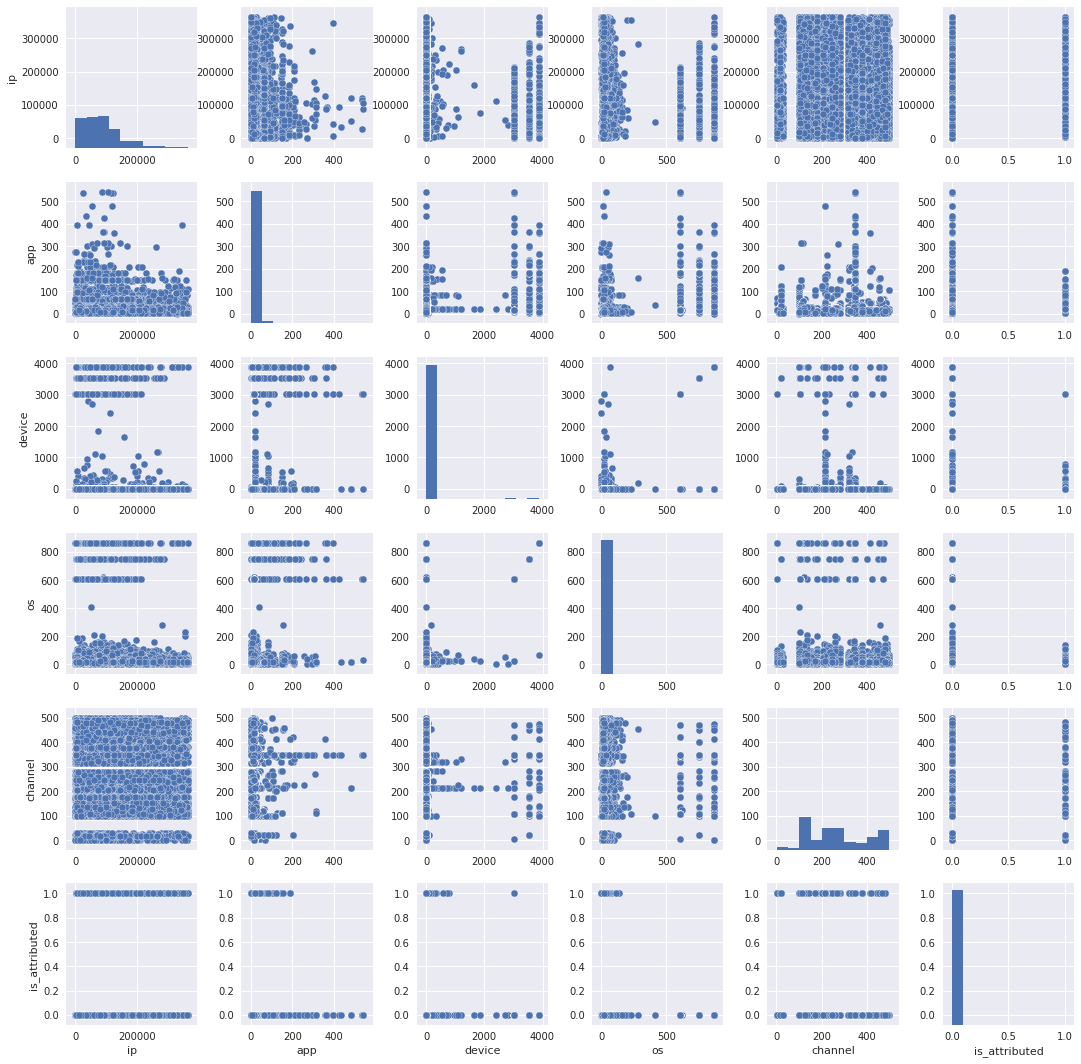

In [13]:
sns.pairplot(df_train)

In [14]:

df_train['os'].astype('category').describe()
df_train['app'].astype('category').describe()
df_train['channel'].astype('category').describe()

count     100000
unique       162
top          280
freq        8156
Name: channel, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
# df_train.loc[:, df_train.columns != 'is_attributed']
X_train, X_test, y_train, y_test = train_test_split( df_train[["ip","app","device","os","channel"]], df_train['is_attributed'], test_size=0.33, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
regr =  LogisticRegression()
regr.fit(X_train, y_train)
print(regr.coef_)

# >>> # The mean square error
# >>> np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)
# 2004.56760268...

# >>> # Explained variance score: 1 is perfect prediction
# >>> # and 0 means that there is no linear relationship
# >>> # between X and y.
regr.score(X_test, y_test) 
# 0.5850753022690...

[[-2.55403733e-06  1.19717558e-02  1.32354700e-03 -1.59380033e-01
  -1.79490955e-02]]


0.9972121212121212

In [17]:
# regr.predict( df_train[["ip","app","device","os","channel"]][0])
zero_user = df_train.loc[86:88,["ip","app","device","os","channel"]]
regr.predict(zero_user)

array([0, 0, 0])

In [ ]:
# df_train_full = pd.read_csv("../input/train.csv")
# df_train_full.head(100)

In [19]:
# regr.score(df_train_full[["ip","app","device","os","channel"]], df_train_full['is_attributed'])